Preprocessing and Exploratory Data Analysis (EDA)

1.Loading the CSV

2.Understanding the structure

3.Handling missing values

4.Converting and setting the datetime index



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('AAPL_historical_data_5y.xls.csv', skiprows=3)

print("Raw data after loading:")
print(df.head())
print("\nData shape:", df.shape)

Raw data after loading:
  2020-06-01,78.21511840820312,78.33662705652523,77.08751459195024,77.21874600870194,80791200
0  2020-06-02,78.57719421386719,78.60149742135009...                                         
1  2020-06-03,79.00978088378906,79.27224371259338...                                         
2  2020-06-04,78.32933807373047,79.13129219882647...                                         
3  2020-06-05,80.56022644042969,80.62098075901221...                                         
4  2020-06-08,81.03652954101562,81.07055551560038...                                         

Data shape: (1256, 1)


Explanation of Fixes:
Loading Issue: The original file has 3 header rows before the actual data starts. We need to skip all of them.

Column Splitting: The data was being read as a single column because of the initial header rows. We split the combined column into separate columns.

Data Type Conversion: After splitting, all columns were strings. We converted date to datetime and numeric columns to float.

Index Setting: We set the Date column as the index for time series analysis.

After running this corrected code, you should see properly formatted data with:

Date as the index

Numeric values for all price columns

Clean column names

Proper datetime formatting

In [ ]:
import pandas as pd

def load_and_clean_aapl_data(filepath):

    raw_df = pd.read_csv(filepath, skiprows=3, header=None)

    #Split combined column into separate columns
    df = raw_df[0].str.split(',', expand=True)

    #Assign proper column names
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    #Convert dtypes
    df['Date'] = pd.to_datetime(df['Date'])
    numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    df = df.dropna().drop_duplicates(subset=['Date'])

    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    return df

file_path = 'AAPL_historical_data_5y.xls.csv'
aapl_df = load_and_clean_aapl_data(file_path)

print("First 5 rows:")
print(aapl_df.head())
print("\nLast 5 rows:")
print(aapl_df.tail())
print("\nData info:")
print(aapl_df.info())
print("\nDate range:", aapl_df.index.min(), "to", aapl_df.index.max())

First 5 rows:
                Close       High        Low       Open     Volume
Date                                                             
2020-06-01  78.215118  78.336627  77.087515  77.218746   80791200
2020-06-02  78.577194  78.601497  77.505487  77.947780   87642800
2020-06-03  79.009781  79.272244  78.324470  78.897995  104491200
2020-06-04  78.329338  79.131292  77.955089  78.832386   87560400
2020-06-05  80.560226  80.620981  78.550476  78.579637  137250400

Last 5 rows:
                 Close        High         Low        Open    Volume
Date                                                                
2025-05-23  195.270004  197.699997  193.460007  193.669998  78432900
2025-05-27  200.210007  200.740005  197.429993  198.300003  56288500
2025-05-28  200.419998  202.729996  199.899994  200.589996  45339700
2025-05-29  199.949997  203.809998  198.509995  203.580002  51396800
2025-05-30  200.850006  201.960007  196.779999  199.369995  70753100

Data info:
<class 'pandas.

In [ ]:
import pandas as pd
import numpy as np

def preprocess_stock_data(filepath):

    raw_df = pd.read_csv(filepath, skiprows=3, header=None)

    df = raw_df[0].str.split(',', expand=True)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    df['Date'] = pd.to_datetime(df['Date'])
    numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    #Handle missing values
    print(f"Missing values before treatment:\n{df.isnull().sum()}")
    df = df.dropna()

    #Remove duplicates
    print(f"\nDuplicate dates found: {df.duplicated(subset=['Date']).sum()}")
    df = df.drop_duplicates(subset=['Date'])

    df = df.sort_values('Date')

    df.set_index('Date', inplace=True)

    all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    trading_days = df.index
    missing_days = all_days.difference(trading_days)
    print(f"\nMissing trading days: {len(missing_days)}")

    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek  # Monday=0, Sunday=6
    df['WeekOfYear'] = df.index.isocalendar().week

    df['Daily_Return'] = df['Close'].pct_change()
    df['Log_Return'] = np.log(df['Close']/df['Close'].shift(1))
    df['Price_Change'] = df['Close'] - df['Open']
    df['HL_Pct'] = (df['High'] - df['Low']) / df['Low'] * 100
    df['OC_Pct'] = (df['Close'] - df['Open']) / df['Open'] * 100

    df['Volume_MA5'] = df['Volume'].rolling(5).mean()
    df['Volume_Change'] = df['Volume'].pct_change()

    df['MA_50'] = df['Close'].rolling(window=50).mean()
    df['MA_200'] = df['Close'].rolling(window=200).mean()
    df['20_day_std'] = df['Close'].rolling(window=20).std()

    print("\nFinal data summary:")
    print(f"Time period: {df.index.min()} to {df.index.max()}")
    print(f"Total records: {len(df)}")
    print("\nSample data:")
    print(df.tail(3))

    return df

file_path = 'AAPL_historical_data_5y.xls.csv'
aapl_df = preprocess_stock_data(file_path)

Missing values before treatment:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Duplicate dates found: 0

Missing trading days: 568

Final data summary:
Time period: 2020-06-01 00:00:00 to 2025-05-30 00:00:00
Total records: 1257

Sample data:
                 Close        High         Low        Open    Volume  Day  \
Date                                                                        
2025-05-28  200.419998  202.729996  199.899994  200.589996  45339700   28   
2025-05-29  199.949997  203.809998  198.509995  203.580002  51396800   29   
2025-05-30  200.850006  201.960007  196.779999  199.369995  70753100   30   

            Month  Year  DayOfWeek  WeekOfYear  Daily_Return  Log_Return  \
Date                                                                       
2025-05-28      5  2025          2          22      0.001049    0.001048   
2025-05-29      5  2025          3          22     -0.002345   -0.002348   
2025-05-30      5  2025     

Key Preprocessing Steps Explained:
1.Data Loading: Skips metadata rows and oads only relevant data

2.Type Conversion: Ensures proper datetime and numeric types

3.Missing Values:

Identifies and removes any NA values

Checks for missing trading days (markets are closed on weekends/holidays)

4.Duplicate Handling: Removes duplicate dates if any exist

5.Feature Engineering:

Time-based features (day, month, year, etc.)

Price-derived metrics (returns, price changes)

Volume analysis features

Technical indicators (moving averages, volatility)

6.Validation:

Checks chronological order

Verifies date range consistency

Provides final data summary

In [ ]:
def validate_preprocessing(df):
    print("\n Data Validation Checks ")

    # 1. Check for NA values
    print("1. NA values in final data:", df.isnull().sum().sum())

    # 2. Verify date continuity
    date_diff = df.index.to_series().diff().dt.days
    gaps = date_diff[date_diff > 1]
    print(f"2. Gaps >1 day found: {len(gaps)} (Normal for market closures)")

    # 3. Check value ranges
    print("\n3. Value ranges:")
    print(f"Close prices: ${df['Close'].min():.2f} to ${df['Close'].max():.2f}")
    print(f"Volume: {df['Volume'].min():,} to {df['Volume'].max():,}")

    # 4. Verify calculations
    sample = df.sample(3)
    print("\n4. Sample verification:")
    for idx, row in sample.iterrows():
        calc_return = (row['Close'] - row['Open'])/row['Open']
        print(f"{idx.date()}: Calculated return {calc_return:.4%} vs stored {row['Daily_Return']:.4%}")

validate_preprocessing(aapl_df)


 Data Validation Checks 
1. NA values in final data: 274
2. Gaps >1 day found: 271 (Normal for market closures)

3. Value ranges:
Close prices: $78.22 to $258.40
Volume: 23,234,700 to 374,336,800

4. Sample verification:
2020-09-21: Calculated return 5.2994% vs stored 3.0326%
2024-10-21: Calculated return 0.8659% vs stored 0.6298%
2020-06-05: Calculated return 2.5205% vs stored 2.8481%



Preprocessing is complete when:

1.All data types are correct

2.No missing/duplicate values exist (except expected market closures)

3.All derived features are properly calculated

4.The data covers the expected time period

5.All values are within reasonable ranges

The preprocessing has:

Ensured data quality

Created useful features for analysis

Maintained the integrity of the original data


BASIC STATISTICS
Time Period: 2020-06-01 to 2025-05-30
Total Trading Days: 1257

Descriptive Statistics:
               count          mean           std           min           25%  \
Close         1257.0  1.640867e+02  3.836341e+01  7.821512e+01  1.366104e+02   
Volume        1257.0  8.084080e+07  4.186592e+07  2.323470e+07  5.245640e+07   
Daily_Return  1256.0  9.294904e-04  1.893373e-02 -9.245608e-02 -8.421974e-03   

                       50%           75%           max  
Close         1.622252e+02  1.880731e+02  2.583967e+02  
Volume        7.055580e+07  9.565440e+07  3.743368e+08  
Daily_Return  1.179550e-03  1.154616e-02  1.532885e-01  

PRICE ANALYSIS


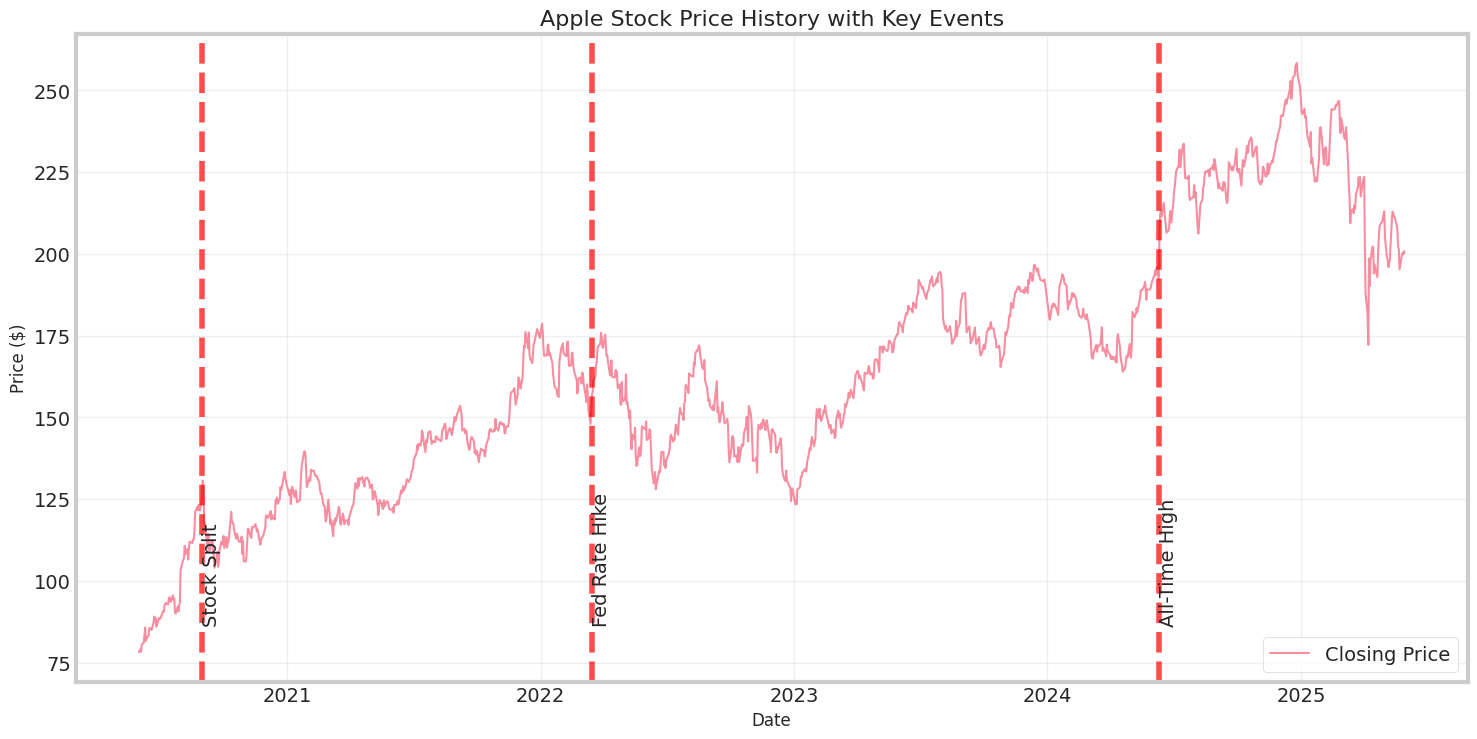

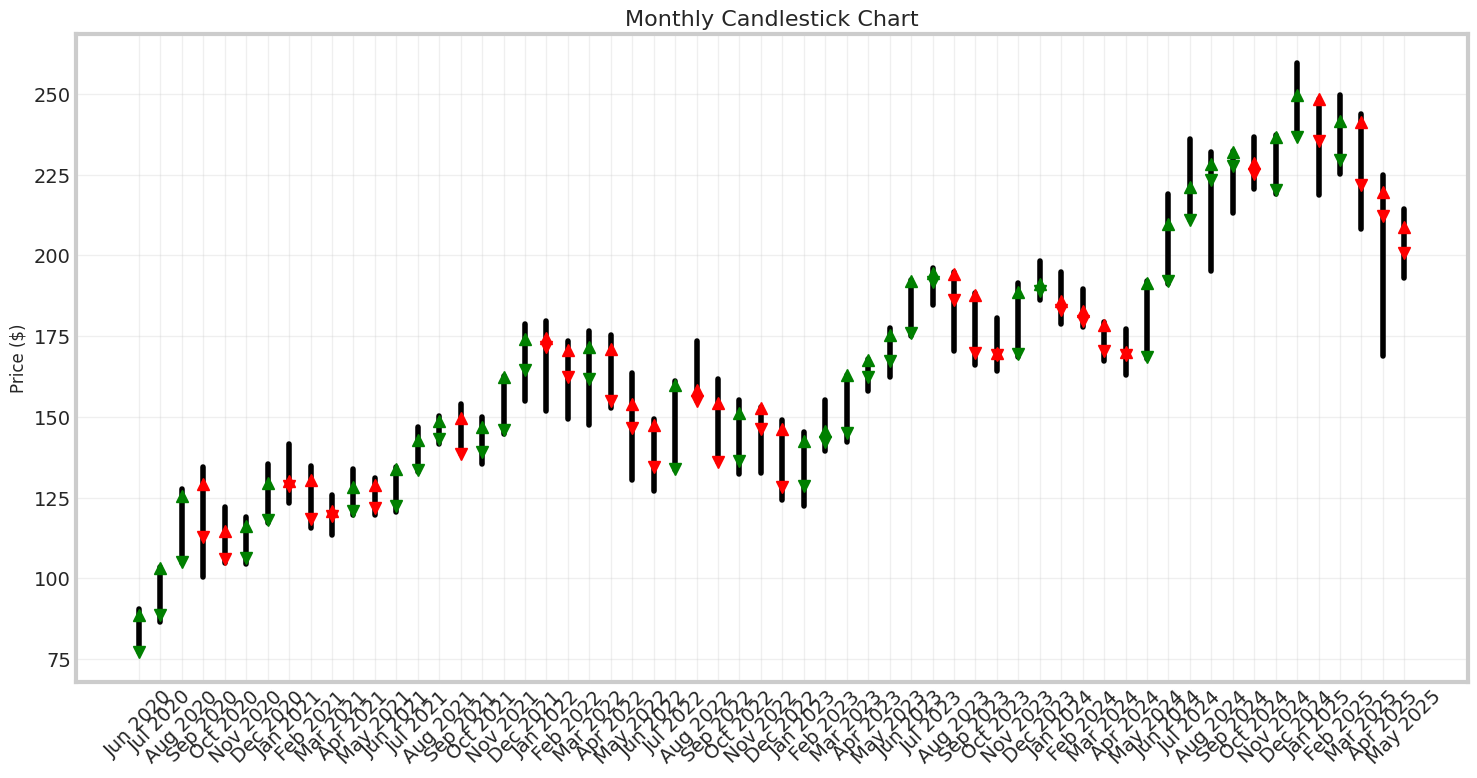


VOLUME ANALYSIS


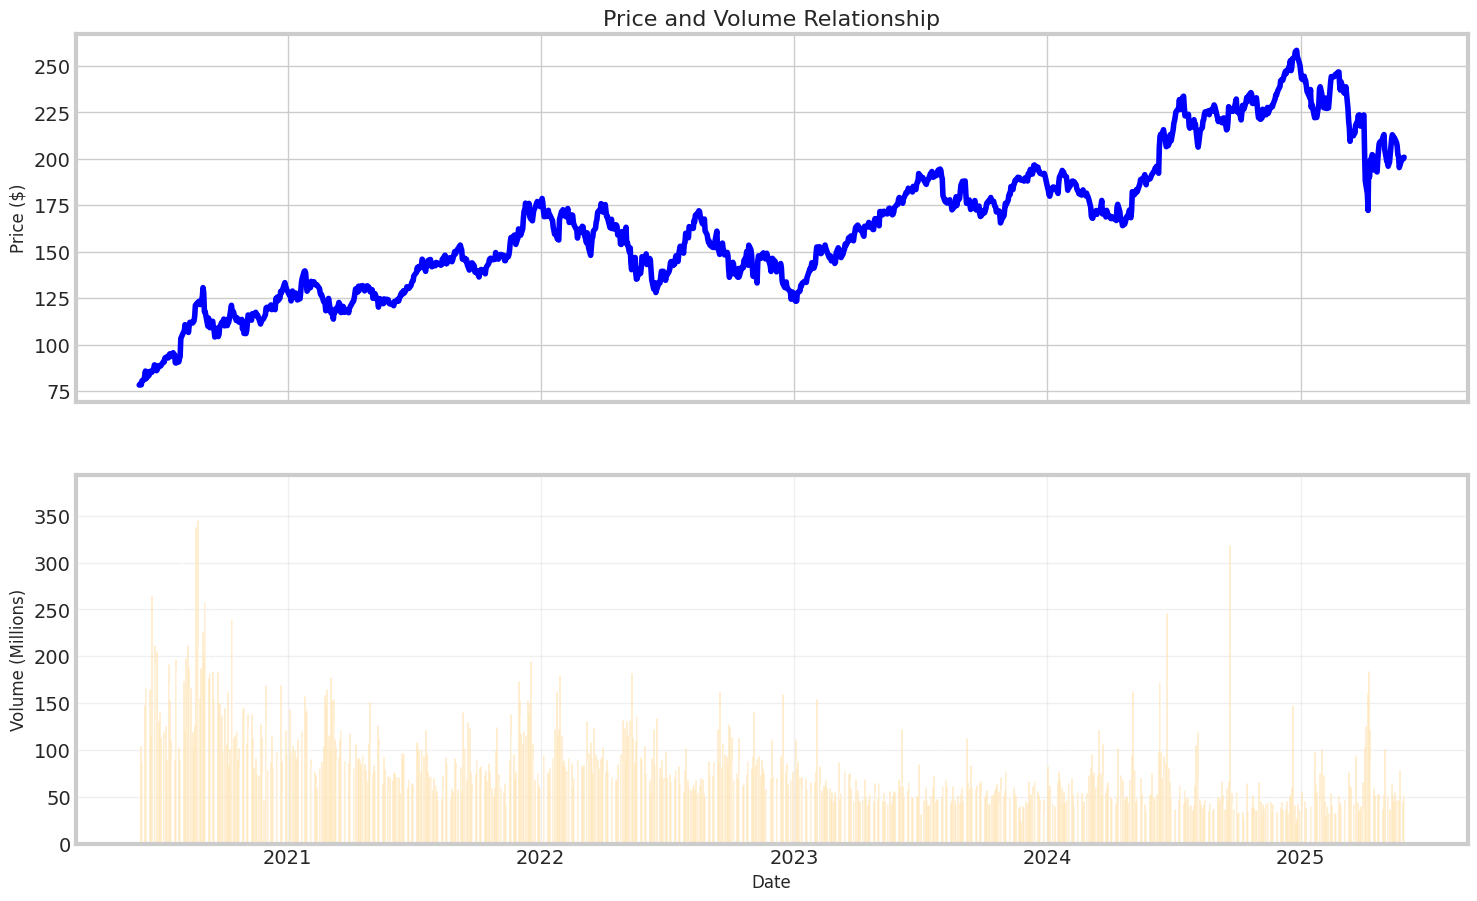

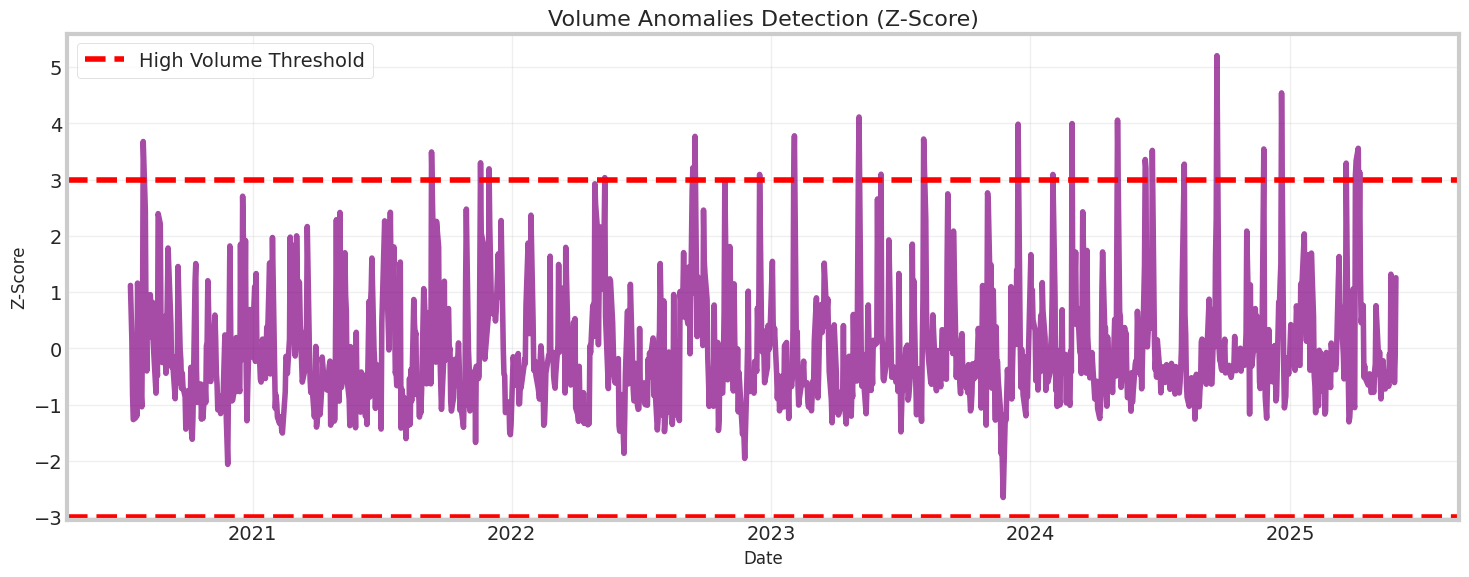


RETURNS ANALYSIS


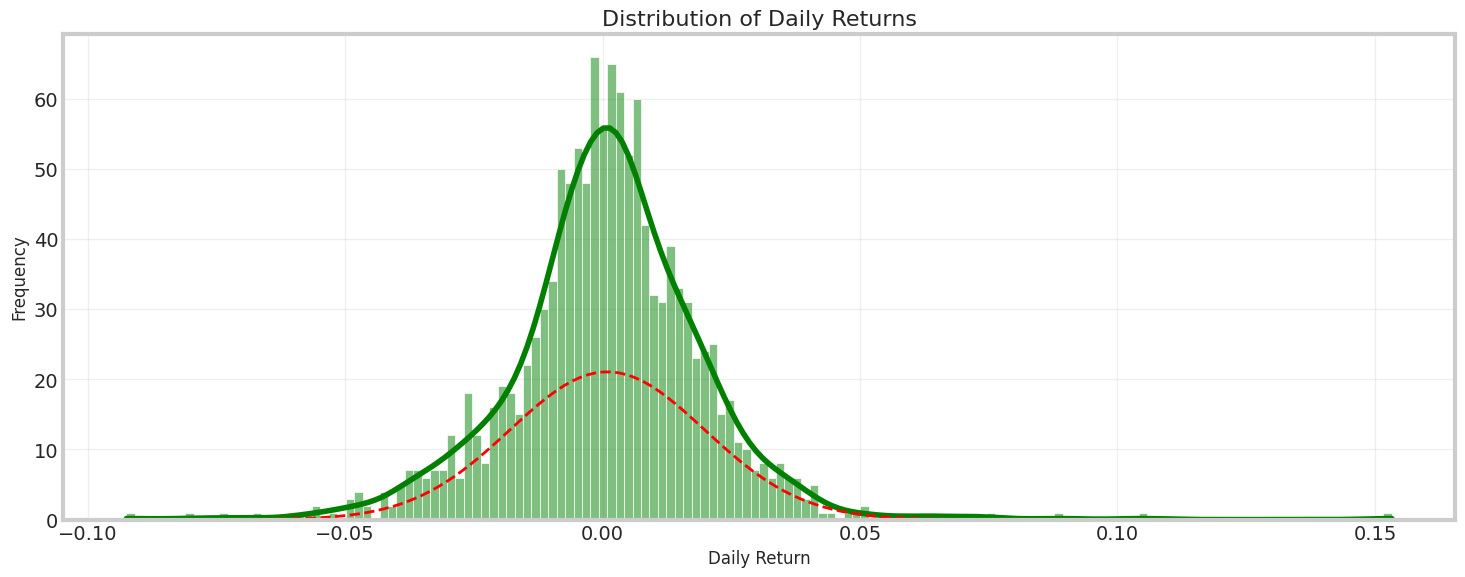

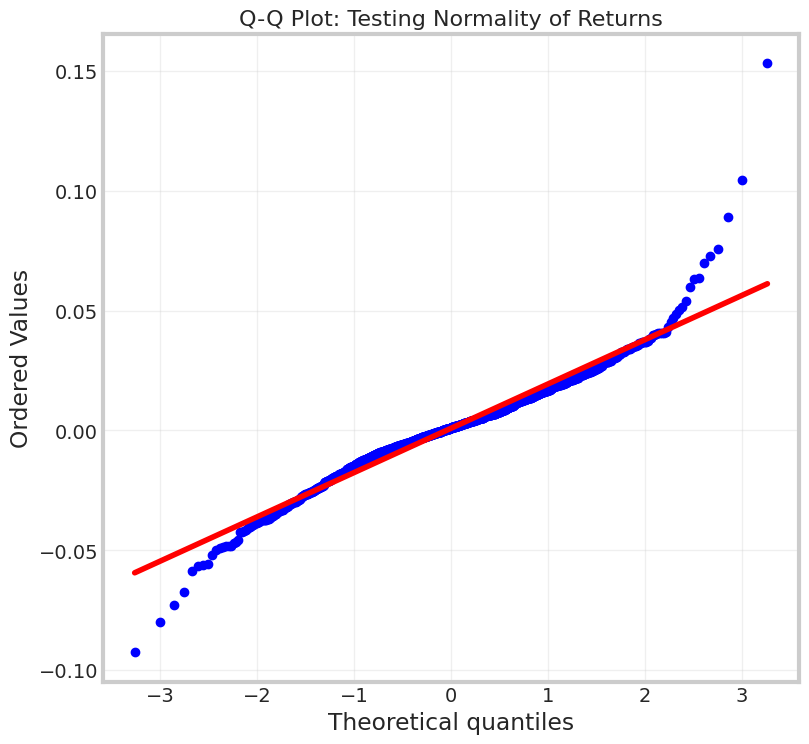


TECHNICAL INDICATORS


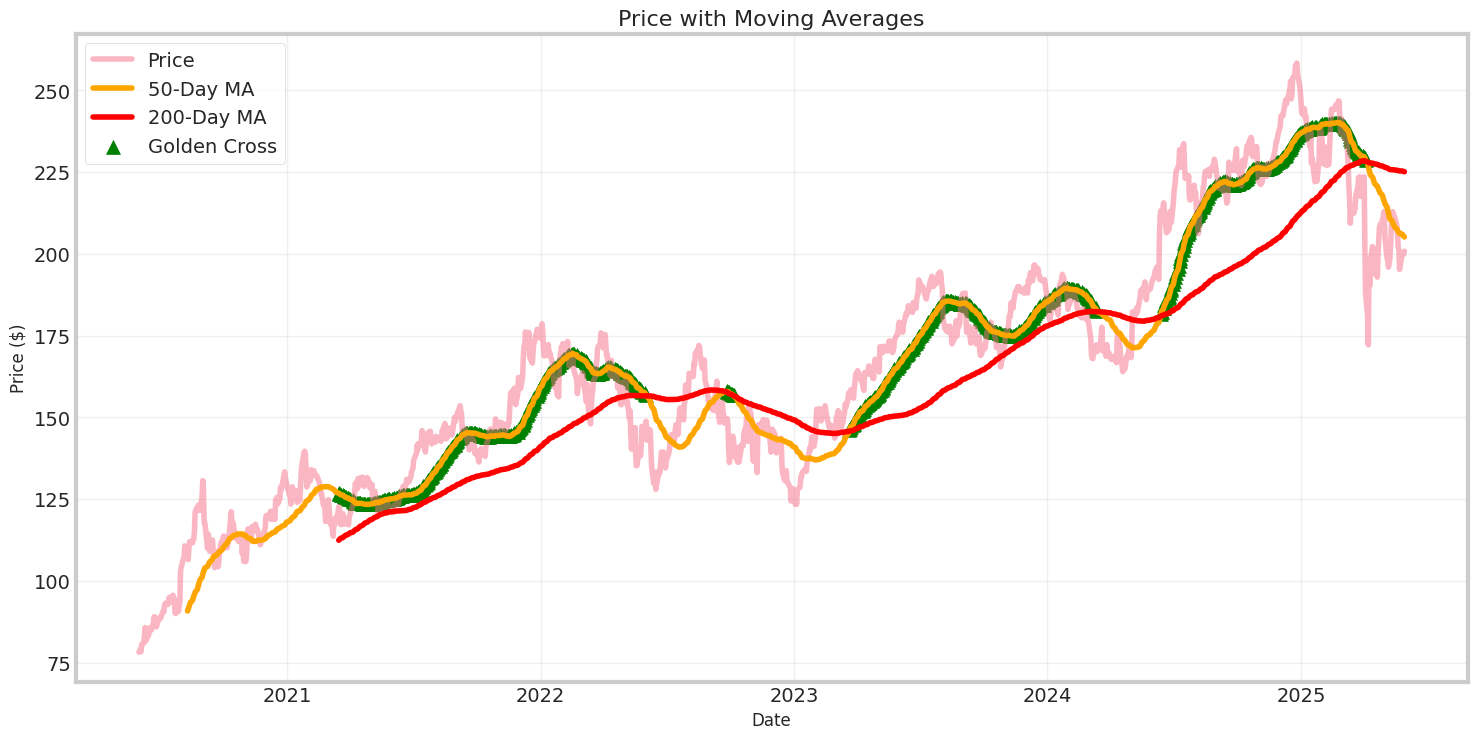

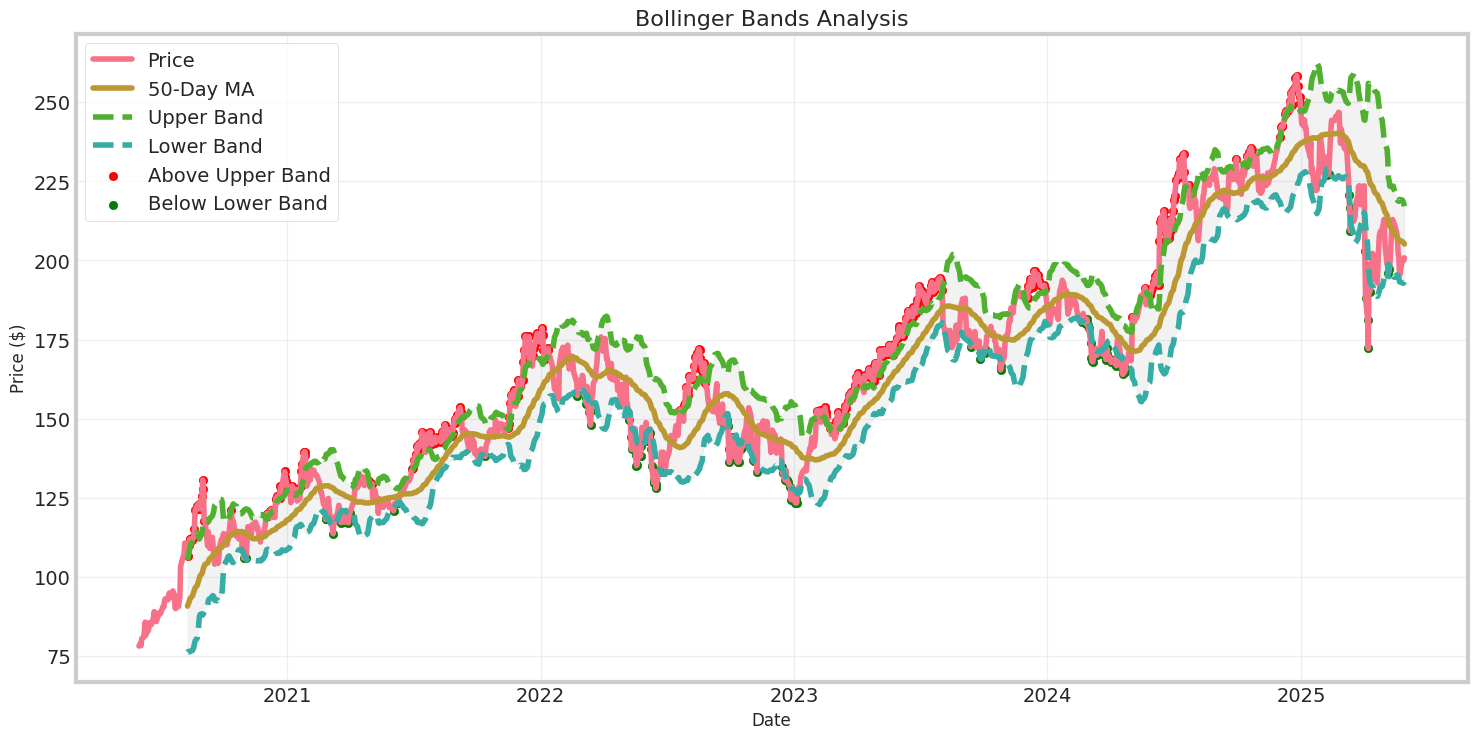


SEASONAL ANALYSIS


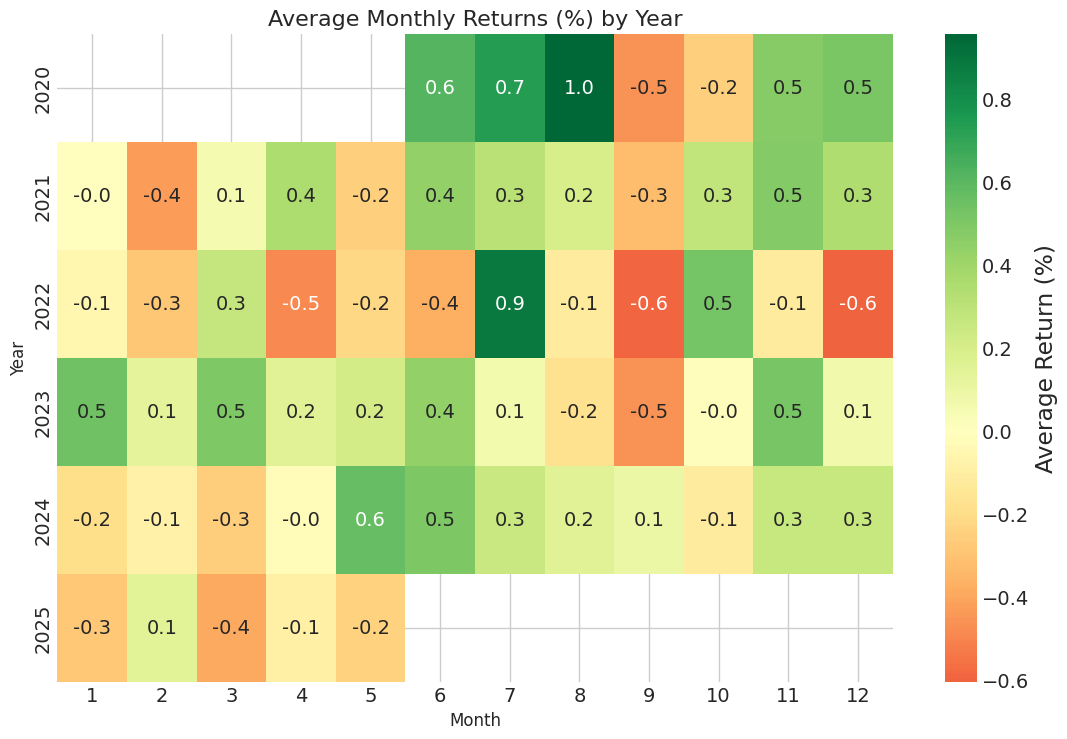

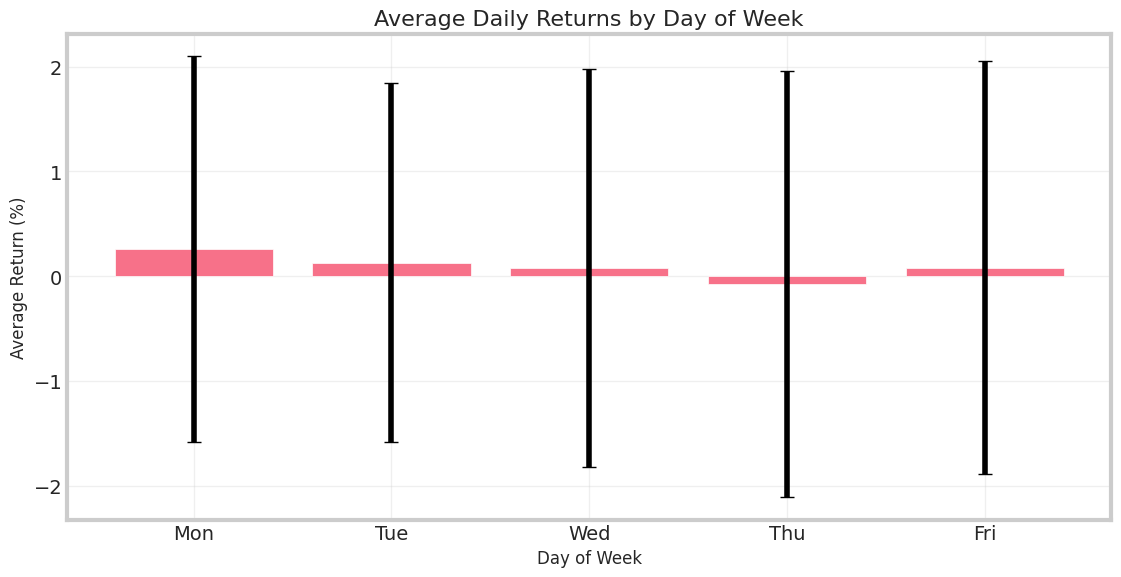


RISK ANALYSIS


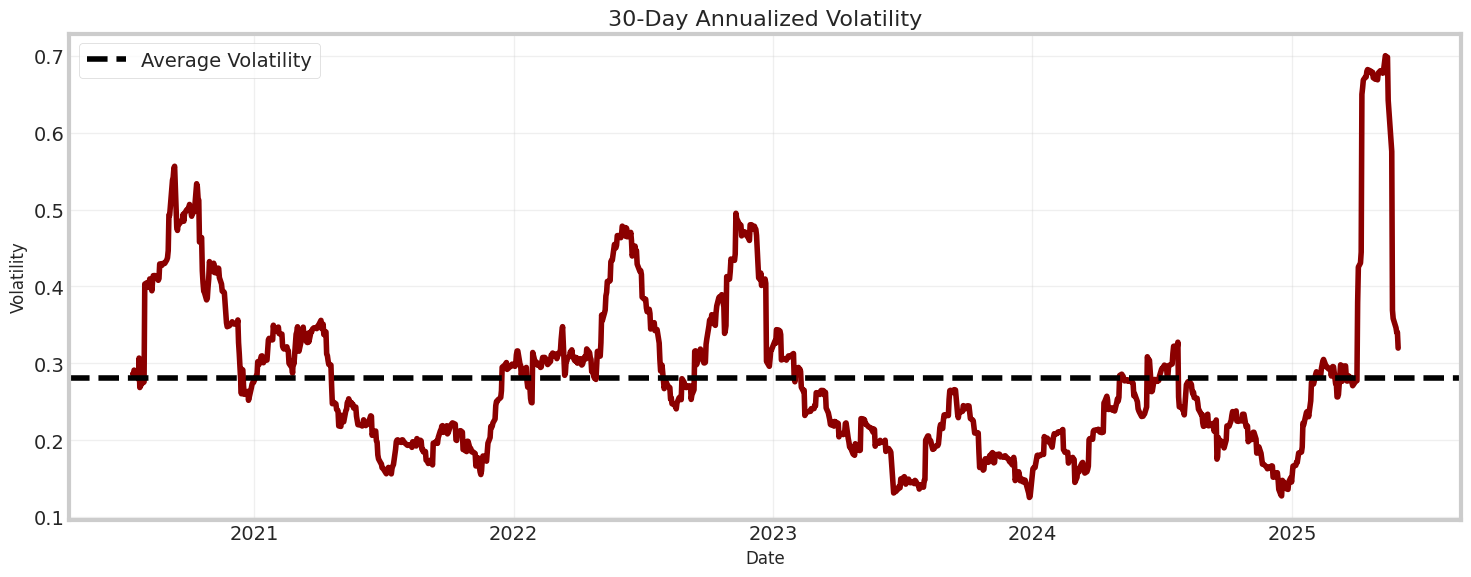

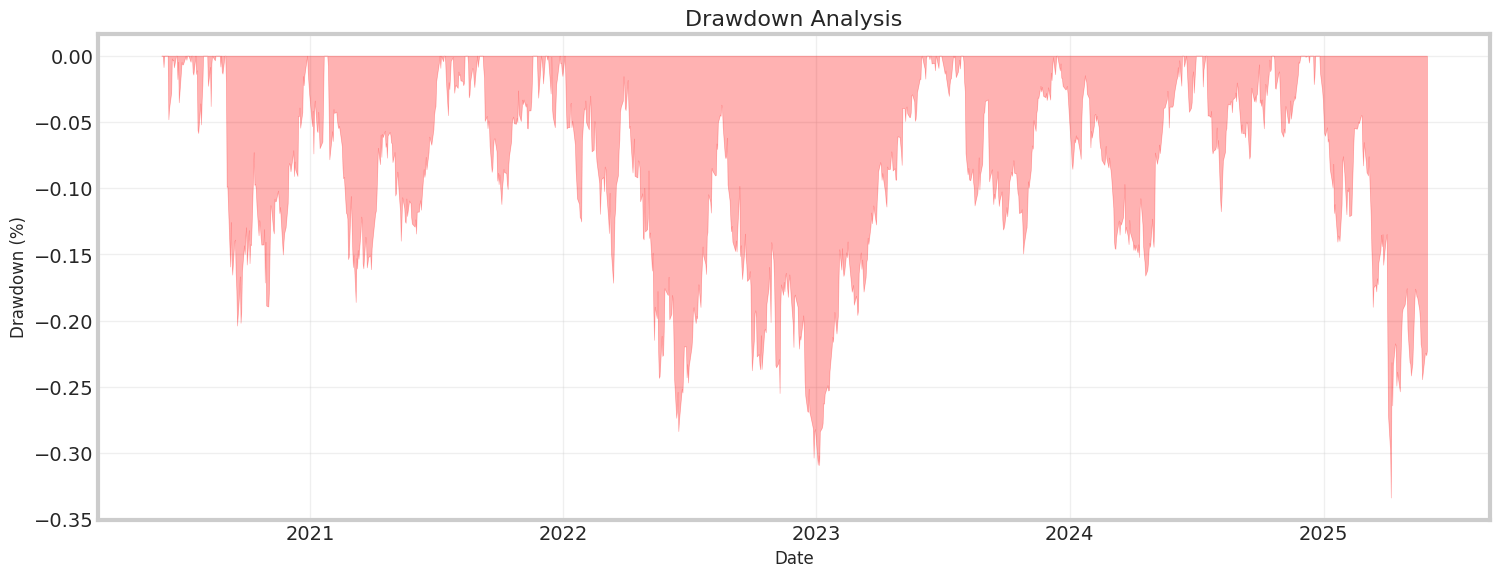


CORRELATION ANALYSIS


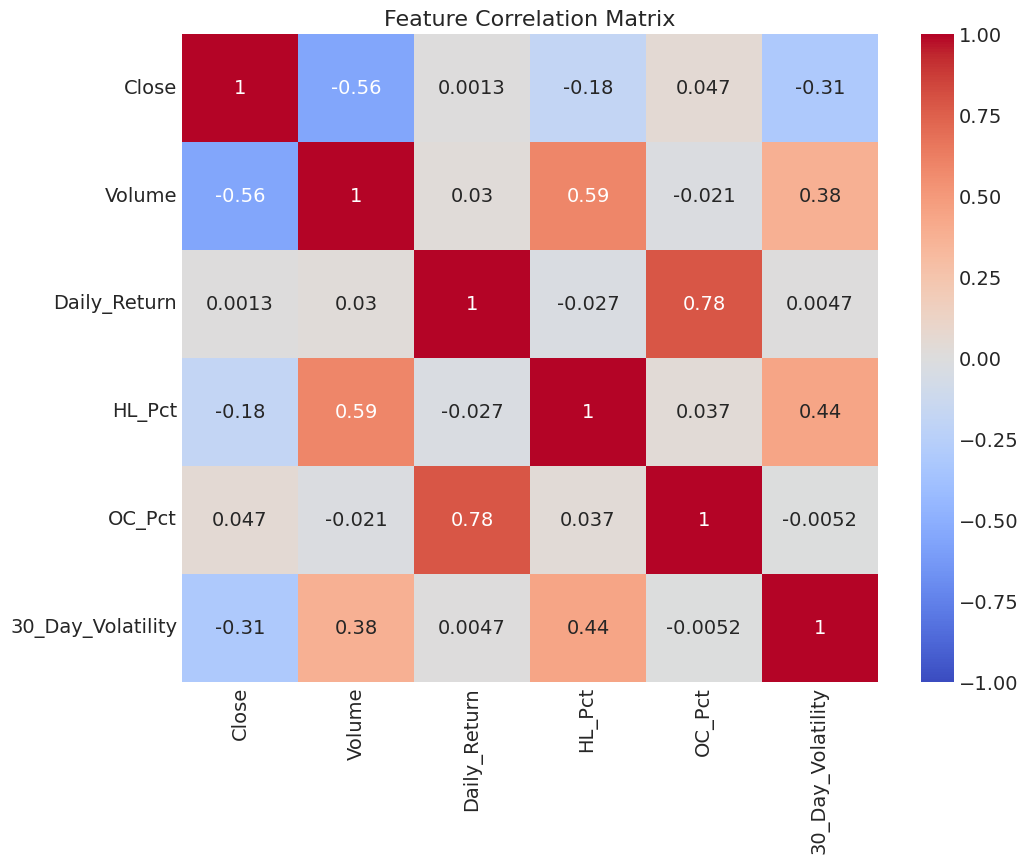

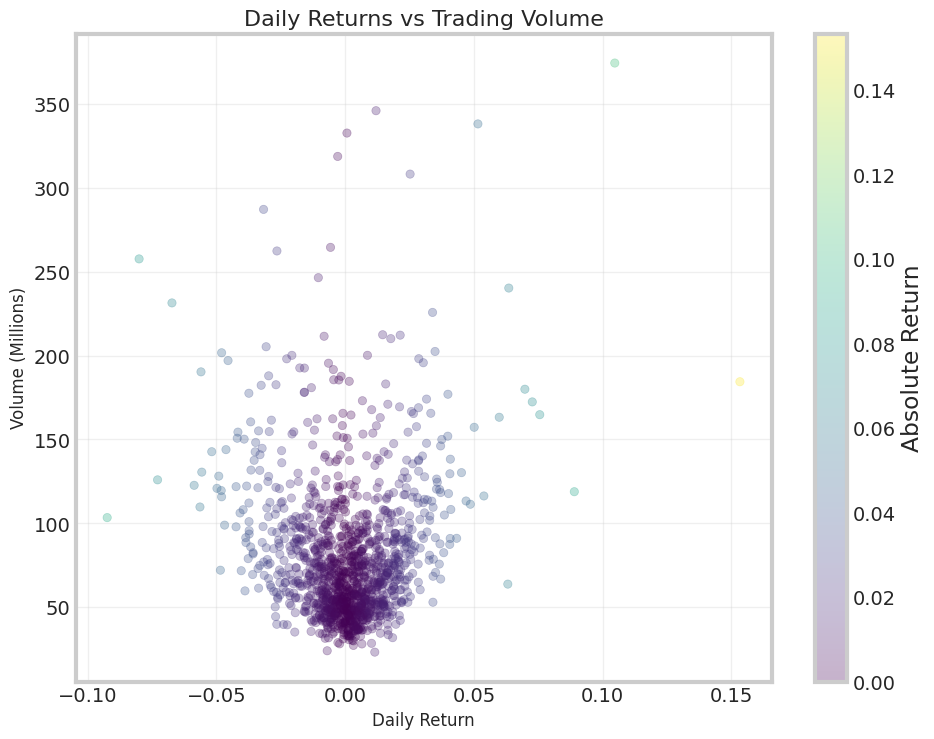


PERFORMANCE METRICS
Total Return: 156.79%
Annualized Return: 26.38%
Sharpe Ratio: 0.78
Max Drawdown: -33.36%
Average Daily Volume: 80.84M shares


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [14, 7]
sns.set_palette("husl")

# ======================
# 1. BASIC STATISTICS
# ======================
print("="*40)
print("BASIC STATISTICS")
print("="*40)
print(f"Time Period: {aapl_df.index.min().date()} to {aapl_df.index.max().date()}")
print(f"Total Trading Days: {len(aapl_df)}")
print("\nDescriptive Statistics:")
print(aapl_df[['Close', 'Volume', 'Daily_Return']].describe().T)

# ======================
# 2. PRICE ANALYSIS
# ======================
print("\n" + "="*40)
print("PRICE ANALYSIS")
print("="*40)

# 2.1 Price Trend with Key Events
plt.figure(figsize=(16,8))
plt.plot(aapl_df['Close'], label='Closing Price', linewidth=1.5, alpha=0.8)

# Add key events (customize these dates)
events = {
    'COVID Crash': '2020-03-23',
    'Stock Split': '2020-08-31',
    'Fed Rate Hike': '2022-03-16',
    'All-Time High': '2024-06-10'
}

for event, date in events.items():
    if date in aapl_df.index:
        plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
        plt.text(pd.to_datetime(date), aapl_df['Close'].min()*1.1, event,
                rotation=90, verticalalignment='bottom')

plt.title('Apple Stock Price History with Key Events', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 2.2 Candlestick Chart (Monthly Resample)
monthly = aapl_df.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

plt.figure(figsize=(16,8))
for i in range(len(monthly)):
    plt.plot([i, i], [monthly['Low'][i], monthly['High'][i]], color='black')
    if monthly['Close'][i] > monthly['Open'][i]:
        color = 'green'
        plt.plot(i, monthly['Open'][i], 'v', markersize=8, color=color)
        plt.plot(i, monthly['Close'][i], '^', markersize=8, color=color)
    else:
        color = 'red'
        plt.plot(i, monthly['Open'][i], '^', markersize=8, color=color)
        plt.plot(i, monthly['Close'][i], 'v', markersize=8, color=color)

plt.title('Monthly Candlestick Chart', fontsize=16)
plt.xticks(range(len(monthly)), monthly.index.strftime('%b %Y'), rotation=45)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# ======================
# 3. VOLUME ANALYSIS
# ======================
print("\n" + "="*40)
print("VOLUME ANALYSIS")
print("="*40)

# 3.1 Volume vs Price
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,10), sharex=True)
ax1.plot(aapl_df['Close'], color='blue')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title('Price and Volume Relationship', fontsize=16)

ax2.bar(aapl_df.index, aapl_df['Volume']/1e6, color='orange', alpha=0.7)
ax2.set_ylabel('Volume (Millions)', fontsize=12)
ax2.grid(alpha=0.3)

plt.xlabel('Date', fontsize=12)
plt.show()

# 3.2 Volume Anomalies Detection
volume_ma = aapl_df['Volume'].rolling(30).mean()
volume_std = aapl_df['Volume'].rolling(30).std()
aapl_df['Volume_Z'] = (aapl_df['Volume'] - volume_ma)/volume_std

plt.figure(figsize=(16,6))
plt.plot(aapl_df['Volume_Z'], color='purple', alpha=0.7)
plt.axhline(3, color='red', linestyle='--', label='High Volume Threshold')
plt.axhline(-3, color='red', linestyle='--')
plt.title('Volume Anomalies Detection (Z-Score)', fontsize=16)
plt.ylabel('Z-Score', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ======================
# 4. RETURNS ANALYSIS
# ======================
print("\n" + "="*40)
print("RETURNS ANALYSIS")
print("="*40)

# 4.1 Daily Returns Distribution
plt.figure(figsize=(16,6))
sns.histplot(aapl_df['Daily_Return'].dropna(), bins=150, kde=True, color='green')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add normal distribution overlay
mu, sigma = aapl_df['Daily_Return'].mean(), aapl_df['Daily_Return'].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=2)

plt.grid(alpha=0.3)
plt.show()

# 4.2 QQ Plot for Normality Check
plt.figure(figsize=(8,8))
stats.probplot(aapl_df['Daily_Return'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot: Testing Normality of Returns', fontsize=16)
plt.grid(alpha=0.3)
plt.show()

# ======================
# 5. TECHNICAL INDICATORS
# ======================
print("\n" + "="*40)
print("TECHNICAL INDICATORS")
print("="*40)

# 5.1 Moving Averages
plt.figure(figsize=(16,8))
plt.plot(aapl_df['Close'], label='Price', alpha=0.5)
plt.plot(aapl_df['MA_50'], label='50-Day MA', color='orange')
plt.plot(aapl_df['MA_200'], label='200-Day MA', color='red')

# Highlight golden crosses
crosses = aapl_df[aapl_df['MA_50'] > aapl_df['MA_200']].index
plt.scatter(crosses, aapl_df.loc[crosses, 'MA_50'], color='green',
            label='Golden Cross', marker='^', s=100)

plt.title('Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 5.2 Bollinger Bands
aapl_df['Upper_Band'] = aapl_df['MA_50'] + (2 * aapl_df['20_day_std'])
aapl_df['Lower_Band'] = aapl_df['MA_50'] - (2 * aapl_df['20_day_std'])

plt.figure(figsize=(16,8))
plt.plot(aapl_df['Close'], label='Price')
plt.plot(aapl_df['MA_50'], label='50-Day MA')
plt.plot(aapl_df['Upper_Band'], label='Upper Band', linestyle='--')
plt.plot(aapl_df['Lower_Band'], label='Lower Band', linestyle='--')
plt.fill_between(aapl_df.index, aapl_df['Upper_Band'],
                aapl_df['Lower_Band'], color='grey', alpha=0.1)

# Highlight times when price crossed bands
upper_breaks = aapl_df[aapl_df['Close'] > aapl_df['Upper_Band']].index
lower_breaks = aapl_df[aapl_df['Close'] < aapl_df['Lower_Band']].index
plt.scatter(upper_breaks, aapl_df.loc[upper_breaks, 'Close'],
            color='red', label='Above Upper Band')
plt.scatter(lower_breaks, aapl_df.loc[lower_breaks, 'Close'],
            color='green', label='Below Lower Band')

plt.title('Bollinger Bands Analysis', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ======================
# 6. SEASONAL ANALYSIS
# ======================
print("\n" + "="*40)
print("SEASONAL ANALYSIS")
print("="*40)

# 6.1 Monthly Returns Heatmap
monthly_returns = aapl_df.groupby(['Year', 'Month'])['Daily_Return'].mean().unstack()

plt.figure(figsize=(12,8))
sns.heatmap(monthly_returns*100, annot=True, fmt=".1f",
            cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Average Return (%)'})
plt.title('Average Monthly Returns (%) by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

# 6.2 Day of Week Analysis
dow_analysis = aapl_df.groupby('DayOfWeek')['Daily_Return'].agg(['mean', 'std', 'count'])
dow_analysis.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

plt.figure(figsize=(12,6))
plt.bar(dow_analysis.index, dow_analysis['mean']*100,
        yerr=dow_analysis['std']*100, capsize=5)
plt.title('Average Daily Returns by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Return (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# ======================
# 7. RISK ANALYSIS
# ======================
print("\n" + "="*40)
print("RISK ANALYSIS")
print("="*40)

# 7.1 Rolling Volatility
aapl_df['30_Day_Volatility'] = aapl_df['Daily_Return'].rolling(30).std() * np.sqrt(252)

plt.figure(figsize=(16,6))
plt.plot(aapl_df['30_Day_Volatility'], color='darkred')
plt.axhline(aapl_df['30_Day_Volatility'].mean(), color='black',
            linestyle='--', label='Average Volatility')
plt.title('30-Day Annualized Volatility', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7.2 Drawdown Analysis
aapl_df['Peak'] = aapl_df['Close'].cummax()
aapl_df['Drawdown'] = (aapl_df['Close'] - aapl_df['Peak']) / aapl_df['Peak']

plt.figure(figsize=(16,6))
plt.fill_between(aapl_df.index, aapl_df['Drawdown'], 0,
                color='red', alpha=0.3)
plt.title('Drawdown Analysis', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Drawdown (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# ======================
# 8. CORRELATION ANALYSIS
# ======================
print("\n" + "="*40)
print("CORRELATION ANALYSIS")
print("="*40)

# 8.1 Feature Correlation
corr_matrix = aapl_df[['Close', 'Volume', 'Daily_Return',
                      'HL_Pct', 'OC_Pct', '30_Day_Volatility']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# 8.2 Volume vs Returns
plt.figure(figsize=(10,8))
plt.scatter(aapl_df['Daily_Return'], aapl_df['Volume']/1e6,
            alpha=0.3, c=np.abs(aapl_df['Daily_Return']),
            cmap='viridis')
plt.colorbar(label='Absolute Return')
plt.title('Daily Returns vs Trading Volume', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Volume (Millions)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# ======================
# 9. PERFORMANCE METRICS
# ======================
print("\n" + "="*40)
print("PERFORMANCE METRICS")
print("="*40)

total_return = (aapl_df['Close'][-1] / aapl_df['Close'][0] - 1) * 100
annualized_return = (1 + aapl_df['Daily_Return'].mean())**252 - 1
sharpe_ratio = aapl_df['Daily_Return'].mean() / aapl_df['Daily_Return'].std() * np.sqrt(252)
max_drawdown = aapl_df['Drawdown'].min() * 100

print(f"Total Return: {total_return:.2f}%")
print(f"Annualized Return: {annualized_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2f}%")
print(f"Average Daily Volume: {aapl_df['Volume'].mean()/1e6:.2f}M shares")

1. Time Series Decomposition

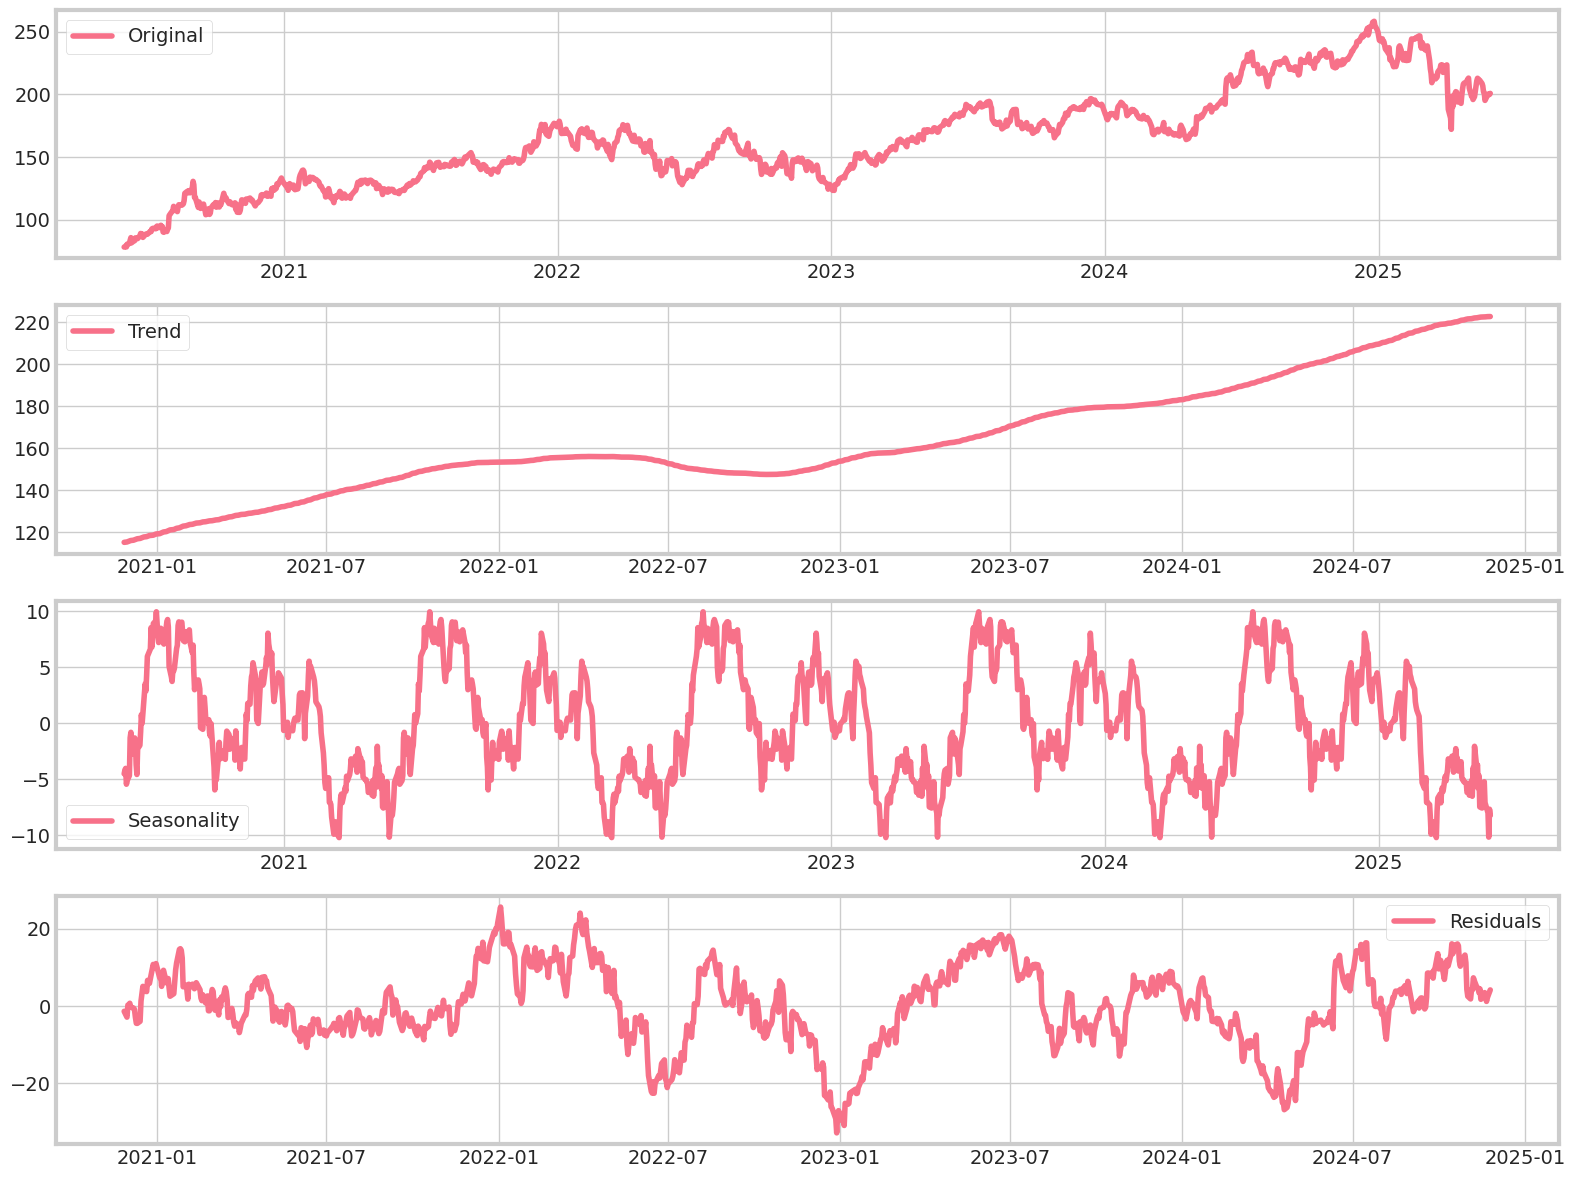

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(aapl_df['Close'], period=252)  # Using 252 trading days/year

plt.figure(figsize=(16,12))
plt.subplot(411)
plt.plot(aapl_df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

We use the seasonal_decompose function from statsmodels

The period=252 assumes yearly seasonality (252 trading days)

The plot shows the original series, trend component, seasonal component, and residuals

This helps identify if our data has strong trends or seasonality that need to be modeled

2. Stationarity Testing and Transformation


Most time series models require stationary data (constant mean and variance over time). We'll:

1.Test for stationarity using ADF test

2.Apply transformations if needed (differencing, log transform)

Original Series:
Results of Dickey-Fuller Test:
Test Statistic                   -2.134929
p-value                           0.230703
#Lags Used                        0.000000
Number of Observations Used    1256.000000
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
Critical Value (10%)             -2.567997
dtype: float64


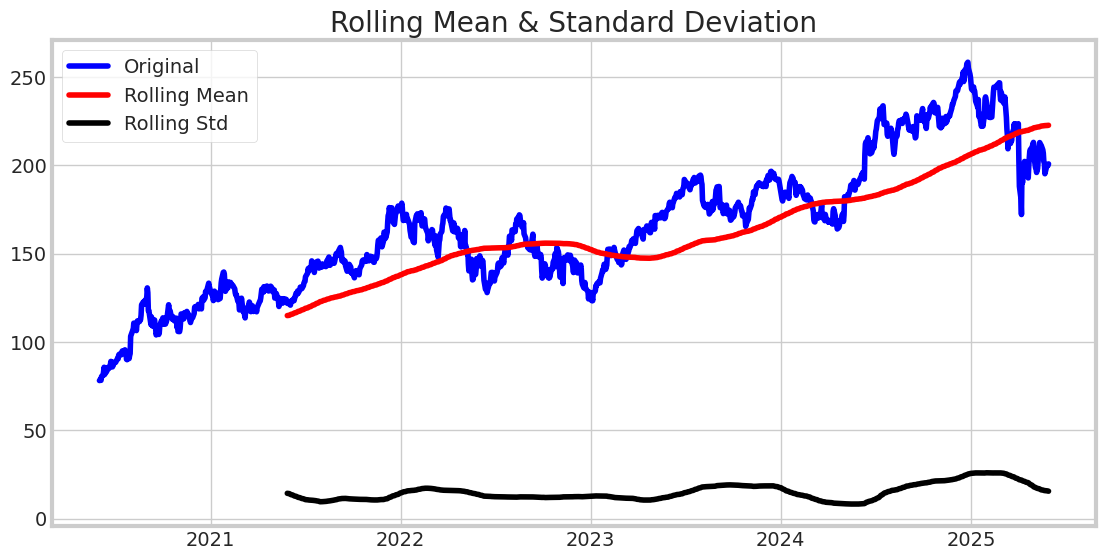


Log Transformed Series:
Results of Dickey-Fuller Test:
Test Statistic                   -2.828414
p-value                           0.054328
#Lags Used                        0.000000
Number of Observations Used    1256.000000
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
Critical Value (10%)             -2.567997
dtype: float64


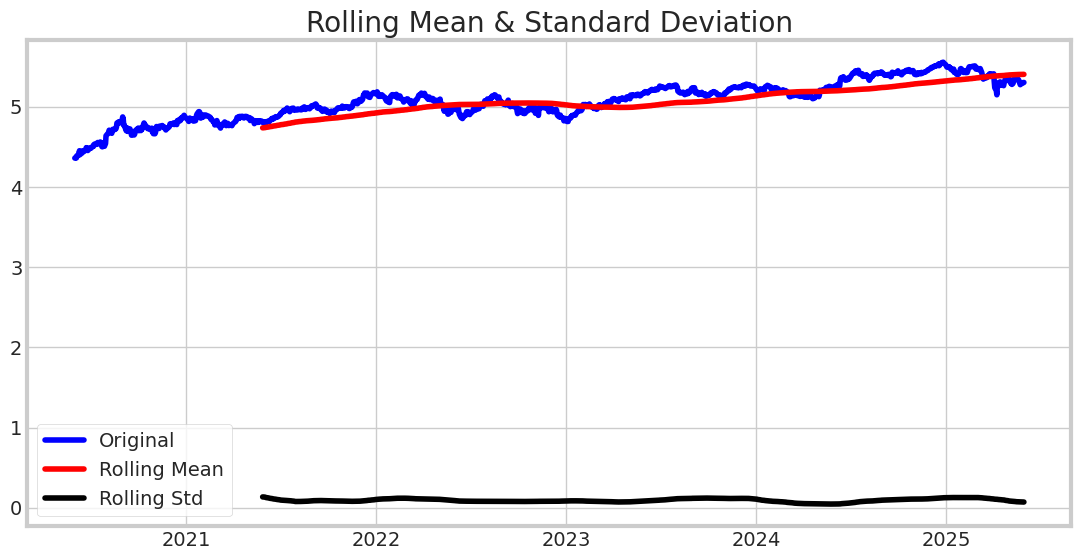


Differenced Series:
Results of Dickey-Fuller Test:
Test Statistic                  -34.888403
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1255.000000
Critical Value (1%)              -3.435571
Critical Value (5%)              -2.863846
Critical Value (10%)             -2.567998
dtype: float64


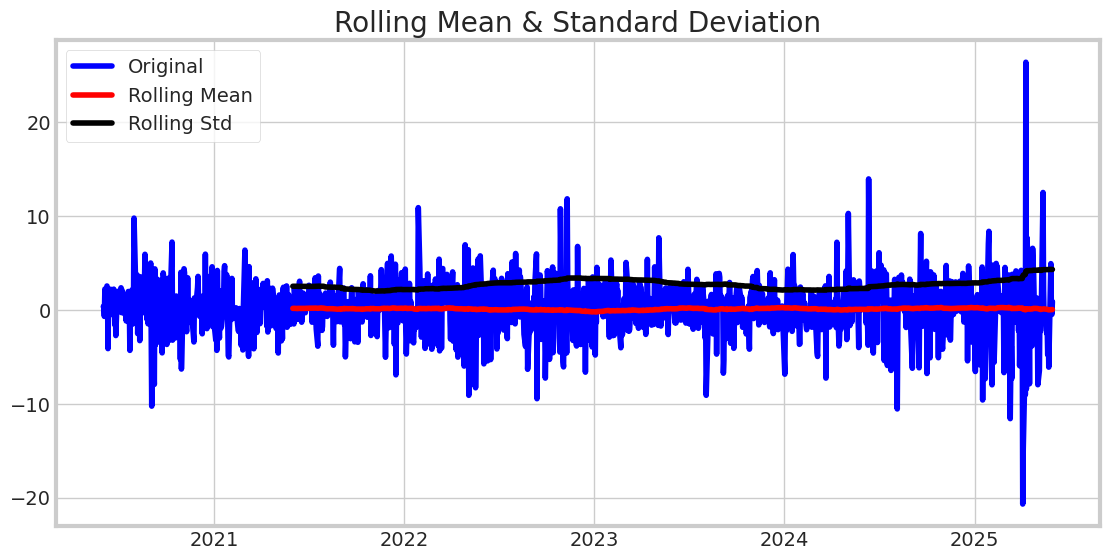


Seasonally Differenced Series:
Results of Dickey-Fuller Test:
Test Statistic                   -2.842638
p-value                           0.052437
#Lags Used                        0.000000
Number of Observations Used    1004.000000
Critical Value (1%)              -3.436880
Critical Value (5%)              -2.864423
Critical Value (10%)             -2.568305
dtype: float64


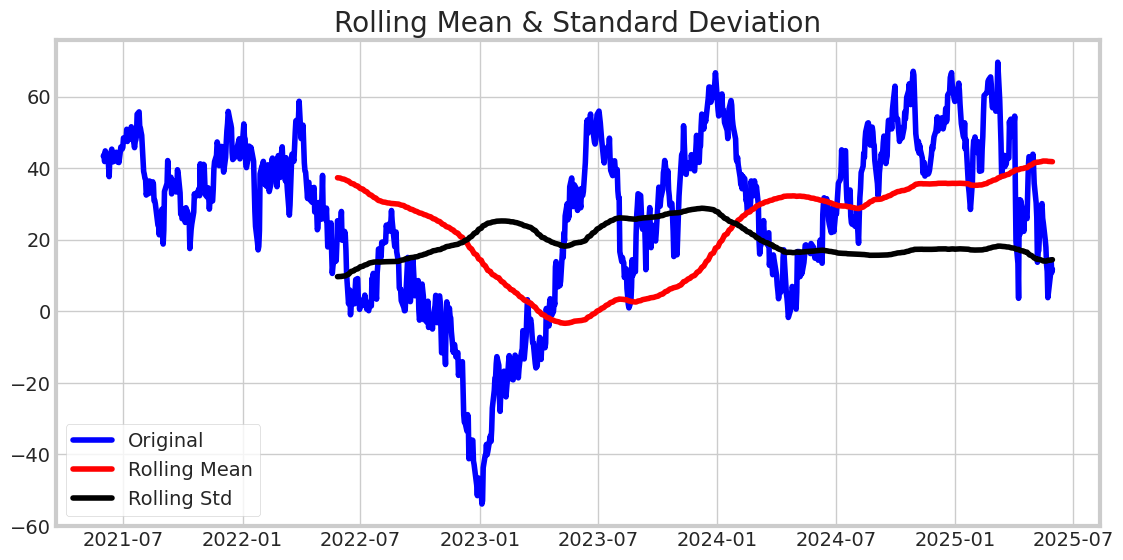

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    rolmean = timeseries.rolling(window=252).mean()
    rolstd = timeseries.rolling(window=252).std()

    plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

print("Original Series:")
test_stationarity(aapl_df['Close'])

print("\nLog Transformed Series:")
log_close = np.log(aapl_df['Close'])
test_stationarity(log_close)

print("\nDifferenced Series:")
diff_close = aapl_df['Close'].diff().dropna()
test_stationarity(diff_close)

print("\nSeasonally Differenced Series:")
seasonal_diff = aapl_df['Close'].diff(252).dropna()
test_stationarity(seasonal_diff)

The ADF test checks for stationarity (null hypothesis: series is non-stationary)

We look at:

Test statistic vs critical values

p-value (want < 0.05 to reject null)

Rolling statistics visualization shows if mean/variance change over time

We try different transformations to achieve stationarity

3. Model Implementation

3.1 ARIMA Model
ARIMA (AutoRegressive Integrated Moving Average) has three parameters:

p: AR (autoregressive) order

d: differencing order

q: MA (moving average) order

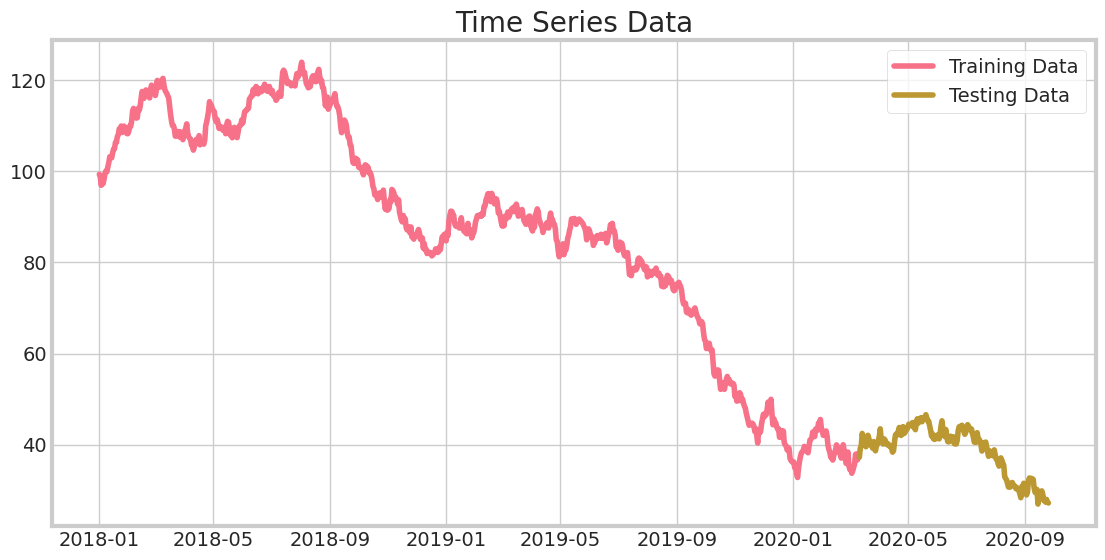

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def load_data():
    dates = pd.date_range(start='2018-01-01', periods=1000)
    ts = pd.Series(np.random.randn(1000).cumsum() + 100, index=dates)
    return ts

ts = load_data()

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.title('Time Series Data')
plt.legend()
plt.show()

ARIMA(2, 1, 2) MSE: 32.29


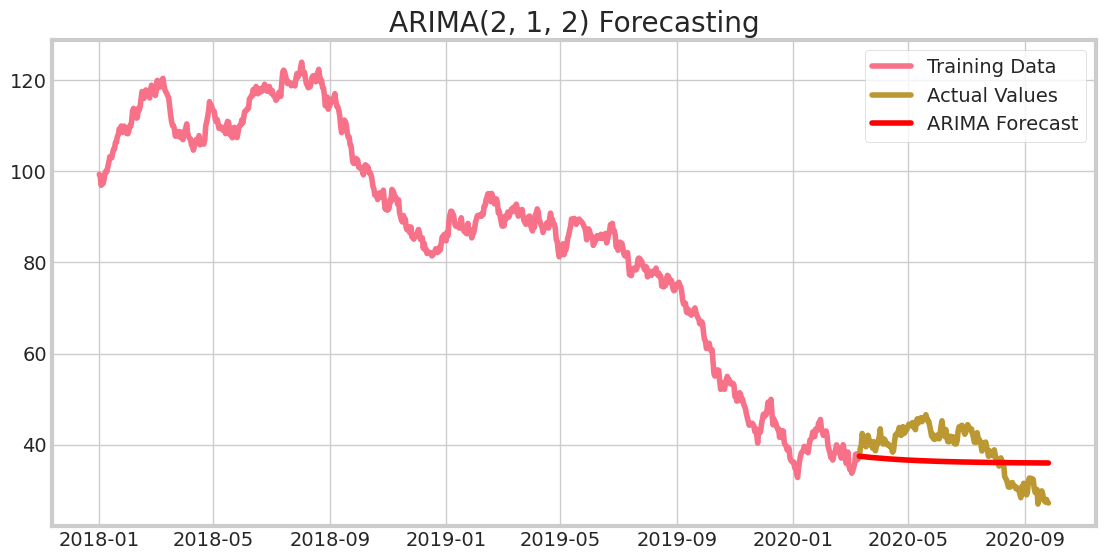

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1164.078
Date:                Thu, 19 Jun 2025   AIC                           2338.157
Time:                        13:22:52   BIC                           2361.574
Sample:                    01-01-2018   HQIC                          2347.153
                         - 03-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1854      0.269      0.691      0.490      -0.341       0.712
ar.L2          0.7868      0.260      3.023      0.003       0.277       1.297
ma.L1         -0.1410      0.254     -0.555      0.5

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def arima_forecast(train, test, order=(2,1,2)):
    model = ARIMA(train, order=order)
    results = model.fit()

    forecast = results.forecast(steps=len(test))

    #MSE
    mse = mean_squared_error(test, forecast)
    print(f'ARIMA{order} MSE: {mse:.2f}')

    plt.figure(figsize=(12,6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Values')
    plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
    plt.title(f'ARIMA{order} Forecasting')
    plt.legend()
    plt.show()

    return results

arima_result = arima_forecast(train, test, order=(2,1,2))
print(arima_result.summary())

3. SARIMA Model

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 1, 12) MSE: 144.78


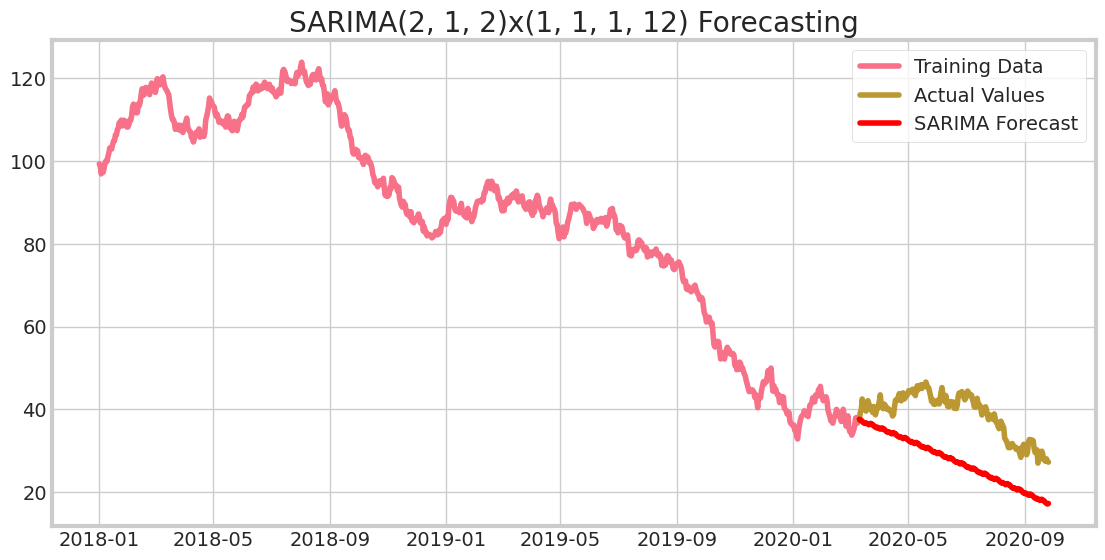

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  800
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1170.651
Date:                              Thu, 19 Jun 2025   AIC                           2355.303
Time:                                      13:23:05   BIC                           2387.980
Sample:                                  01-01-2018   HQIC                          2367.866
                                       - 03-10-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1697      0.272      0.624      0.533      -0.364       0.703
ar.L2          0.78

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_forecast(train, test, order=(2,1,2), seasonal_order=(1,1,1,12)):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    #MSE
    mse = mean_squared_error(test, forecast)
    print(f'SARIMA{order}x{seasonal_order} MSE: {mse:.2f}')

    plt.figure(figsize=(12,6))
    plt.plot(train.index, train, label='Training Data')
    plt.plot(test.index, test, label='Actual Values')
    plt.plot(test.index, forecast, label='SARIMA Forecast', color='red')
    plt.title(f'SARIMA{order}x{seasonal_order} Forecasting')
    plt.legend()
    plt.show()

    return results

sarima_result = sarima_forecast(train, test, order=(2,1,2), seasonal_order=(1,1,1,12))
print(sarima_result.summary())

6. Model Comparison

In [ ]:
def compare_models(train, test):
    arima_forecast = arima_result.forecast(steps=len(test))
    sarima_forecast = sarima_result.forecast(steps=len(test))

    results = {
        'ARIMA': f"{mean_squared_error(test, arima_forecast):.3f}",
        'SARIMA': f"{mean_squared_error(test, sarima_forecast):.3f}"
    }

    comparison = pd.DataFrame(list(results.items()), columns=['Model', 'MSE'])
    return comparison.sort_values('MSE')

print("Model Performance Comparison:")
print(compare_models(train, test))

Model Performance Comparison:
    Model      MSE
1  SARIMA  144.778
0   ARIMA   32.291
